See the graph and explanation at the bottom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#scale the pixel values to 0-1 range
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape)

X_train = X_train.reshape((-1,28*28))   #784 dimension
X_test = X_test.reshape((-1,28*28))

print(X_train.shape)
print(X_test.shape)

#do PCA on the whole training set, unsupervised data is abundant
pca = PCA(n_components=20)       #Extract 20 principal components from the original training examples
pca.fit(X_train)


(60000, 28, 28)
(60000, 784)
(10000, 784)


array([ 9.7, 16.8, 23. , 28.4, 33.3, 37.6, 40.9, 43.8, 46.6, 49. , 51.1,
       53.1, 54.8, 56.5, 58.1, 59.6, 60.9, 62.2, 63.4, 64.6])

In [ ]:
# use N training examples for the supervised part
N = 500
X_train_labelled = X_train[:N]
y_train = y_train[:N]

X_train_reduced_by_PCA = pca.transform(X_train_labelled)  #fit_transform would use this N-example set as the data to fit
X_test_reduced_by_PCA = pca.transform(X_test)


In [ ]:
#good to check if the classes are ordered (good to have them in mixed order
#taking the first 1000 examples can be problematic otherwise
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

<Figure size 432x288 with 0 Axes>

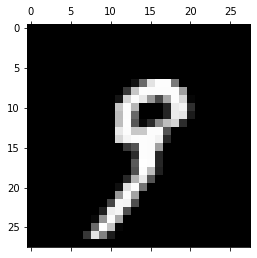

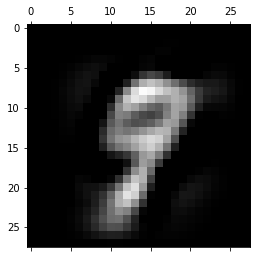

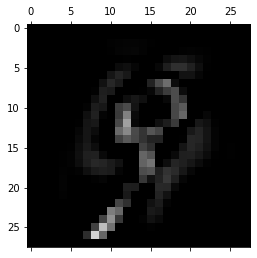

In [ ]:
#Let us visally examine how well 20 components work?
recons_train = pca.inverse_transform(X_train_reduced_by_PCA)
residual_train = X_train_labelled-recons_train     #deflation

plt.figure(1)
plt.matshow(X_train_labelled[19,:].reshape(28, 28), cmap=plt.cm.gray, vmin=0, vmax=1)

plt.figure(2)
plt.matshow(recons_train[19,:].reshape(28, 28), cmap=plt.cm.gray, vmin=0, vmax=1)

plt.figure(3)
plt.matshow(residual_train[19,:].reshape(28, 28), cmap=plt.cm.gray, vmin=0, vmax=1)


In [ ]:
#Are we using too few for training?
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, learning_rate_init=.1)

mlp.fit(X_train_labelled, y_train)
print("Training set score: %f" % mlp.score(X_train_labelled, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 2.16463045
Iteration 2, loss = 1.44368920
Iteration 3, loss = 0.83826796
Iteration 4, loss = 0.53443553
Iteration 5, loss = 0.39606220
Iteration 6, loss = 0.32302218
Iteration 7, loss = 0.25991786
Iteration 8, loss = 0.20347379
Iteration 9, loss = 0.16700498
Iteration 10, loss = 0.12970235
Training set score: 0.980000
Test set score: 0.827000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Does PCA with 20 components keep enough of the variance in the data?
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, learning_rate_init=.1)

mlp.fit(X_train_reduced_by_PCA, y_train)
print("Training set score: %f" % mlp.score(X_train_reduced_by_PCA, y_train))
print("Test set score: %f" % mlp.score(X_test_reduced_by_PCA, y_test))



Iteration 1, loss = 2.37820834
Iteration 2, loss = 1.37074496
Iteration 3, loss = 0.85092346
Iteration 4, loss = 0.60670480
Iteration 5, loss = 0.47100753
Iteration 6, loss = 0.39125261
Iteration 7, loss = 0.34061405
Iteration 8, loss = 0.29768792
Iteration 9, loss = 0.26366312
Iteration 10, loss = 0.23389180
Training set score: 0.928000
Test set score: 0.817600


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Try Decision Trees on the full dimensionality
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_labelled, y_train)
print("Training set score: %f" % clf.score(X_train_labelled, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))


Training set score: 1.000000
Test set score: 0.569800


In [ ]:
#Try Decision Trees on the reduced dimensions
clf = DecisionTreeClassifier()
clf.fit(X_train_reduced_by_PCA, y_train)
print("Training set score: %f" % clf.score(X_train_reduced_by_PCA, y_train))
print("Test set score: %f" % clf.score(X_test_reduced_by_PCA, y_test))


Training set score: 1.000000
Test set score: 0.602200


In [ ]:
#Try KNN on the full dimensionality
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_labelled, y_train)
print("Training set score: %f" % clf.score(X_train_labelled, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))


Training set score: 1.000000
Test set score: 0.829400


In [ ]:
#Try KNN on the reduced dimensions
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_reduced_by_PCA, y_train)
print("Training set score: %f" % clf.score(X_train_reduced_by_PCA, y_train))
print("Test set score: %f" % clf.score(X_test_reduced_by_PCA, y_test))


Training set score: 1.000000
Test set score: 0.845200


In [ ]:
variance = pca.explained_variance_ratio_ # Calculate variance ratios
var = np.cumsum(np.round(variance, decimals=3)*100)
var # Cumulative sum of variance explained with [n] features

array([ 9.7, 16.8, 23. , 28.4, 33.3, 37.6, 40.9, 43.8, 46.6, 49. , 51.1,
       53.1, 54.8, 56.5, 58.1, 59.6, 60.9, 62.2, 63.4, 64.6])

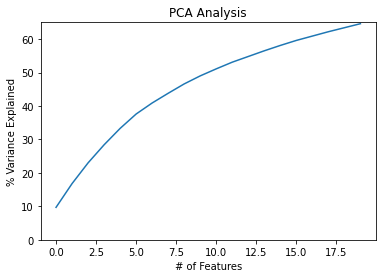

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,65)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

As you can see from the above graph, as the number of features increases the % of variance explained also increases asymptotically. This graph was also created with n=100 and only accounted for ~85% of the variance. This demonstrates the decreasing rate of return for additional PCAs as those toward the begin of the list account for the most variance.